# DATA - Advanced Methods of Data Processing 
## Exercise: Pandas in Jupyter

In [1]:
## Your code here 
print("Exercise by: Janne Bragge")

Exercise by: Janne Bragge


#### Step 1: remove unneeded rows and calculate all rows and 'timeout'rows 

In [2]:
## 1. Copy google_ping.txt file to file temp.txt
## 2. Strip first (1) row from the file temp.txt
## 3. Strip 4 last rows from the file temp.txt
## 4. Print 10 first rows of file temp.txt to see if it looks as it should 

In [3]:
## Task 1:
!cp ../data/google_ping.txt temp.txt

with open("temp.txt", "r") as file:
    lines = file.readlines()
with open("temp.txt", "w") as file:
    file.writelines(lines[1:-4])

!head -n 10 temp.txt

 

64 bytes from 74.125.205.138: icmp_seq=0 ttl=106 time=22.476 ms
64 bytes from 74.125.205.138: icmp_seq=1 ttl=106 time=24.295 ms
64 bytes from 74.125.205.138: icmp_seq=2 ttl=106 time=89.301 ms
Request timeout for icmp_seq 3
64 bytes from 74.125.205.138: icmp_seq=3 ttl=106 time=149.829 ms
64 bytes from 74.125.205.138: icmp_seq=4 ttl=106 time=66.600 ms
64 bytes from 74.125.205.138: icmp_seq=5 ttl=106 time=143.979 ms
64 bytes from 74.125.205.138: icmp_seq=6 ttl=106 time=40.057 ms
64 bytes from 74.125.205.138: icmp_seq=7 ttl=106 time=120.769 ms
64 bytes from 74.125.205.138: icmp_seq=8 ttl=106 time=25.637 ms


In [4]:
## 5. calculate all rows in the file 'temp.txt' and save the result as variable 'ping_count' 
## 6. calculate rows with text 'timeout' in the file 'temp.txt' and save the result  as variable 'timeout_count'

## You might need to change data types e.g.   
# ping_count = int(ping_count[0])
# timeout_count = int(timeout_count[0])

In [5]:
## Task 2:
# Calculate all rows
with open("temp.txt", "r") as file:
    ping_count = sum(1 for line in file)

# Calculate rows with 'timeout'
with open("temp.txt", "r") as file:
    timeout_count = sum(1 for line in file if 'timeout' in line)

# Convert to integers
ping_count = int(ping_count)
timeout_count = int(timeout_count)

ping_count

 

95

#### Step 2: replace 'timeout'rows with text `NaN` and leave only ping times to other rows (e.g. 22.476). I.e. remove all other texts in the rows. 

**hint1.** In this cell you need only `sed` command 

**hint2.** Try first command `!sed -i -e 's/[0-9]\{1,3\}\.[0-9]\{1,3\}\.[0-9]\{1,3\}\.[0-9]\{1,3\}//g' temp.txt` and investigate it's results by printing file `temp.txt`

In [6]:
## 1. replace rows with 'timeout' with text 'NaN'  
## 2. leave only ping times to other rows (e.g. 22.476). I.e. remove all other texts in the rows.
## 3. Print 10 first rows of file temp.txt to see if it looks as it should 

In [7]:
## Task 3:
!sed -i -e 's/timeout/NaN/g' temp.txt

!sed -i 's/^.*time=\(.*\) ms$/\1/; s/^Request NaN for icmp_seq.*$/NaN/' temp.txt

!head -n 10 temp.txt

 

22.476
24.295
89.301
NaN
149.829
66.600
143.979
40.057
120.769
25.637


#### Step 3: Read 'temp.txt' to Jupyter  

In [8]:
## You can use following code rows to read the ping data from the file.
# 1. ping_data = !cat temp.txt
# 2. import numpy as np
# 3. ping_list = list(np.float_(ping_data))

In [9]:
## Task 4:
ping_data = !cat temp.txt

import numpy as np

ping_list = list(np.float_(ping_data))

 

#### Step 4: Make Pandas dataframe from the 'ping_list' and investigate it by using pandas describe methods and plotting it.    

In [10]:
## 1. import pandas 
## 2. Make Pandas dataframe 'ping_df' from the 'ping_list' 
## 3. Calculate NaN values (= timeout rows) in 'ping_df'
## 4. Print first 10 rows if 'ping_df'

In [11]:
## Task 5:
import pandas as pd

ping_df = pd.DataFrame(ping_list)


nan_count = ping_df.isna().sum()
print('ping_df NaN count is:', nan_count[0])

ping_df.head(10)

 

ping_df NaN count is: 1


,0
0,22.476
1,24.295
2,89.301
3,NaN
4,149.829
5,66.600
6,143.979
7,40.057
8,120.769
9,25.637


In [12]:
## 5. Investigate 'ping_df' statistics with pandas 'describe' function

In [13]:
## Task 6:
ping_df.describe()

 

,0
count,94.000000
mean,44.663734
std,40.234384
min,21.390000
25%,23.411750
50%,24.754500
75%,37.386000
max,153.979000


In [14]:
## 6. Use matplotlib inline to plot 'ping_df' data

<Axes: >

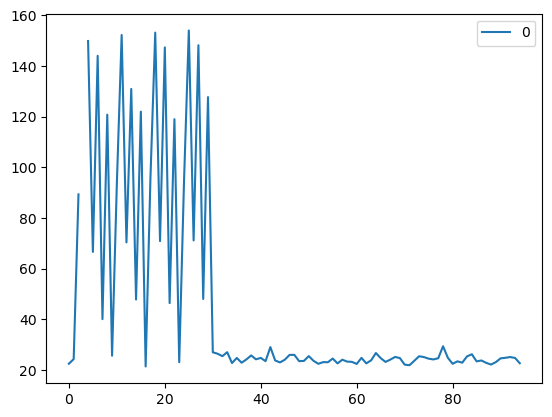

In [15]:
## Task 7:
%matplotlib inline

ping_df.plot()

 

### Check your answers by running following cell:

In [16]:
# Do not change this code!

import sys
sys.path.insert(0, '../answers/data_pandas_answers/')
from data_pandas_check import check_ping

print("Results:")
correct = check_ping(ping_count, timeout_count, ping_df)
print("Correct answers", correct, "/ 3.")


Results:
Correct answers 3 / 3.


### Nice work! 

It is easy to use Pandas. Isn't it? :)